In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 4分木アルゴリズムの動作確認

In [10]:
qtree_data=pd.read_csv('data/qtree.csv',header=None)
morton_data=pd.read_csv('data/morton.csv',header=None,delimiter=' ')

<AxesSubplot:xlabel='0', ylabel='1'>

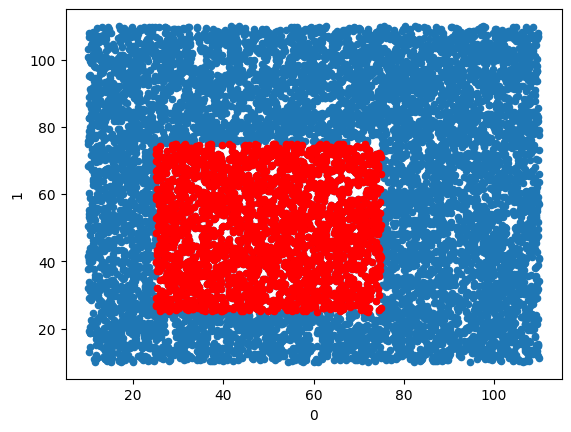

In [11]:
#qtree_data[(abs(qtree_data[0]-50)>25)|(abs(qtree_data[1]-50)>25)].sort_values(0)
#pd.set_option('max_row', None)
# 前のn(今は10000)個を全体のデータとして扱うプロトコル
all_points=qtree_data[0:10000]
researched_points=qtree_data[10000:]
ax=all_points.plot.scatter(x=0,y=1)
researched_points.plot.scatter(x=0,y=1,color='red',ax=ax)
#all_points[(abs(all_points[0]-50)<=50/2)&(abs(all_points[1]-50)<=50/2)].plot.scatter(x=0,y=1,color='green',ax=ax)
#plt.show()

In [27]:
print(researched_points.drop_duplicates().shape)
print(researched_points.shape)

(930, 2)
(930, 2)


In [58]:
morton_data.apply(lambda x:x.apply(lambda y:f'{y:032b}'),axis=1)

,0,1
0,00110000000000000000000000000000,00111111111111111111111111111111
1,01100000000000000000000000000000,01101111111111111111111111111111
2,01110000000000000000000000000000,01111010101010101010101010101010
3,10010000000000000000000000000000,10011111111111111111111111111111
4,10110000000000000000000000000000,10110101010101010101010101010101
5,11000000000000000000000000000000,11001111111111111111111111111111
6,11010000000000000000000000000000,11011010101010101010101010101010
7,11100000000000000000000000000000,11100101010101010101010101010101
8,11110000000000000000000000000000,11110000000000000000000000000000


In [61]:
morton_data.apply(lambda x:x.apply(lambda y:y>>28),axis=1)

,0,1
0,3,3
1,6,6
2,7,7
3,9,9
4,11,11
5,12,12
6,13,13
7,14,14
8,15,15
